### Import

In [1]:
import sys
import os
import matplotlib.pyplot as plt
from datetime import datetime

sys.path.insert(0, '../..')

print("Start: " + datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

from config import *
from network import *
from helper import *

Start: 2025-03-04 14:24:21


### Initialization

In [2]:
## tf.reset_default_graph() only works under tf 1.0

# Set up the state-value estimator and policy estimator
estimator_policy = PolicyEstimator(learning_rate, nS)
estimator_value = StateValueEstimator(learning_rate, nS)

# Initialize bus lines
line1 = create_line(D, stations, max_passenger_per_station, waiting_time_cost, \
                   cost_per_deploy, passenger_boarded_per_time, penalty_per_overtake, \
                    no_bus_deploy_penalty, reward_per_passenger)

line2 = create_line(D, stations, max_passenger_per_station, waiting_time_cost, \
                   cost_per_deploy, passenger_boarded_per_time, penalty_per_overtake, \
                    no_bus_deploy_penalty, reward_per_passenger)

### Training

In [3]:
# Add ops to save and restore all the variables

print("Starting policy gradient...")

# Start training
print("Training in progress...")
avg_rewards = reinforce(line1, estimator_policy, estimator_value, n_epochs, n_iters, batch_size, display_step)

Starting policy gradient...
Training in progress...
Epoch 100, Average reward = -3.320
Epoch 200, Average reward = -2.882
Epoch 300, Average reward = -3.498
Epoch 400, Average reward = -3.248
Epoch 500, Average reward = -2.925
Epoch 600, Average reward = -2.232
Epoch 700, Average reward = -3.005
Epoch 800, Average reward = -2.616
Epoch 900, Average reward = -2.209
Epoch 1000, Average reward = -2.123
Epoch 1100, Average reward = -2.136
Epoch 1200, Average reward = -2.282
Epoch 1300, Average reward = -2.054
Epoch 1400, Average reward = -1.931
Epoch 1500, Average reward = -2.306
Epoch 1600, Average reward = -2.084
Epoch 1700, Average reward = -1.990
Epoch 1800, Average reward = -1.872
Epoch 1900, Average reward = -1.880
Epoch 2000, Average reward = -1.850
Epoch 2100, Average reward = -1.881
Epoch 2200, Average reward = -1.905
Epoch 2300, Average reward = -1.976
Epoch 2400, Average reward = -1.855
Epoch 2500, Average reward = -1.855
Epoch 2600, Average reward = -1.802
Epoch 2700, Average r

### Model save

In [4]:
# Save the variables to disk
print("Saving model...")
save_path = os.path.join(os.getcwd(), "policy_grad_model.h5")
estimator_policy.save(save_path)  # Saves both the model architecture and weights

Saving model...


### Illustration

End: 2025-03-04 15:33:32
Plotting resulting graph...
Plotting baseline 1...
End: 2025-03-04 15:33:40


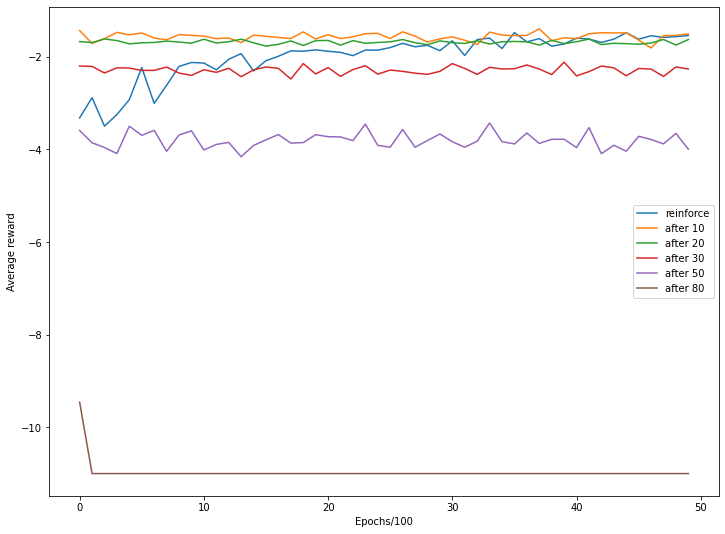

In [5]:
# Plot the graphs of average rewards during testing phases of the policy
# gradient method and the hand-crafted policies

print("End: " + datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

print("Plotting resulting graph...")
plt.figure(figsize = (12, 9))
plt.plot(avg_rewards, label="reinforce")
print("Plotting baseline 1...")
plt.plot(fixed(line2, 10, int(n_epochs/display_step)), label="after 10")
plt.plot(fixed(line2, 20, int(n_epochs/display_step)), label="after 20")
plt.plot(fixed(line2, 30, int(n_epochs/display_step)), label="after 30")
plt.plot(fixed(line2, 50, int(n_epochs/display_step)), label="after 50")
plt.plot(fixed(line2, 80, int(n_epochs/display_step)), label="after 80")
plt.legend(loc='best',prop={'size': 10})
plt.ylabel("Average reward")
plt.xlabel("Epochs/100")
plt.savefig('train.png')

print("End: " + datetime.now().strftime('%Y-%m-%d %H:%M:%S'))